In [2]:
import os
os.getcwd()
# os.chdir("OneDrive - Univerza v Ljubljani/Namizje/Uvod-v-programiranje---Projektna-naloga")


'c:\\Users\\Matevž\\OneDrive - Univerza v Ljubljani\\Namizje\\Uvod-v-programiranje---Projektna-naloga'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [62]:
moč = pd.read_csv("podatki/tier_list.csv")
strategije = pd.read_csv("podatki/top_decks.csv")
vse_karte = pd.read_csv("podatki/total_cards.csv")

# Yu-Gi-Oh!

Yu-Gi-Oh! je popularna igra s kartami. Igra se igra z zbiri velikosti med 40 in 60 kart, pri čemer je vse skupaj navoljo nekaj preko 10.000 različnih kart. Vsak igralec svoj zbir (kupček, s tujko deck) načrtuje na osnovi raznih strategij in posameznih močnih kart, s katerimi poskuša zmagati posamezno igro. V tem projektu bom snel podatk s spletne strani [Master Duel Meta](https://www.masterduelmeta.com/), ki ima zbrane podatke o uspešnosti raznih strategij. Hrani tudi sezname zbirov, ki jih na njej objavljajo uporabniki.

Prvo si poglejmo, katere so trenutno najmočnejše strategije.

### Najboljše strategije

Moč strategij je v viru ocenjena na podlagi njene uspešnosti na raznih spletnih turnirjih. To pomeni, da lestvica ne predstavlja le učinkovitosti strategije, ampak delno tudi njeno popularnost. Znano dejstvo je na primer, da je *Snake-Eye Fire King* bolša strategija kot *Yubel*, kar ob času pisanja lestvica ne prikazuje.

In [15]:
# Polepšanje tabele 1
moč["stopnja"] = moč["stopnja"].apply(int)
if type(moč["moč"][0]) == numpy.float64:
    moč["moč"] = moč["moč"].apply("{:.1f}".format)
moč.style.hide(axis="index")

ime strategije,moč,stopnja
Yubel,25.0,1
Snake-Eye Fire King,12.5,1
Branded,7.5,2
Rescue-ACE,6.0,3
Snake-Eye,5.5,3
Tearlaments,3.0,3


In [41]:
print(f'Tabela kaže, da sta trenutno dve najboljši strategiji \x1B[3m{moč["ime strategije"][0]}\x1B[0m in \x1B[3m{moč["ime strategije"][1]}\x1B[0m.')

Tabela kaže, da sta trenutno dve najboljši strategiji Yubel in Snake-Eye Fire King.


### Priljubljenost strategij

Na spletni strani se nahaja ~300 aktualnih zbirov, ki so jih naložili uporabnikii v zadnjih dveh tednih. Iz števila objavljenih zbirov lahko sklepamo na priljibljenost strategij. Običajno so popularne strategija tudi najboljše. 

In [10]:
strategije.head(10)

,ime strategije,število zbirov
0,Yubel,50
1,Voiceless Voice,38
2,Snake-Eye Fire King,21
3,Branded,16
4,Tearlaments,16
5,Ice Barrier,15
6,Stun,15
7,Labrynth,11
8,Centur-Ion,10
9,Raidraptor,10


Če primerjamo zgornji dve tabeli ugotovimo, da so najboljše strategije tudi tiste, ki imajo objavljenih največ zbirov, se pravi so priljubljene. Pri tem izstopa nova strategija *Voiceless Voice*, ki ni med najuspešnejšimi.

### Frekveca pojavitve posameznih kart

In [9]:
x = 0
for num in strategije["število zbirov"]:
    x += num
print(f'V zadnjih dveh tednih je bilo naloženih {x} zbirov za {len(strategije)} različnih strategij.')

V zadnjih dveh tednih je bilo naloženih 386 zbirov za 79 različnih strategij.


Med vsemi temi zbiri imamo pribljižno 20.000 kart, od tega okoli 1500 različnih. Posamezna karta je v nekem zbiru lahko v največ treh kopijah. Za posamezno karto preverimo, kalikokrat se je pojavila v vseh zbirih ter v koliko različnih zbirih se nahaja. Igra Yu-Gi-Oh! posamezen zbir kart dodatno deli še na glavni zbir (main deck) in dodatni zbir (extra deck). To predstavlja dve medsebojno ekskluzivni lokaciji, kjer se posamezna karta lahko nahaja.

In [21]:
vse_karte.sort_values(by="število pojavitve", ascending=False).head(15).style.hide(axis="index")

karta,število pojavitve,število zbirov,lokacija
"Maxx ""C""",788,265,main
Infinite Impermanence,771,280,main
Ash Blossom & Joyous Spring,712,242,main
Called by the Grave,524,262,main
Evenly Matched,353,136,main
S:P Little Knight,262,244,extra
Droll & Lock Bird,256,101,main
Triple Tactics Talent,242,156,main
Effect Veiler,233,105,main
Crossout Designator,175,175,main


w

In [55]:
'''Prikaže tabelo kart s 3 stolpci 
1 - št. pojavitev/št. strategij 
2 - št. pojavitev/zbiri, kjer se pojavi vsaj enkrat
3 - št. zbirov kjer se pojavi/št. strategij'''

st_zbirov = 0
for num in strategije["število zbirov"]:
    st_zbirov += num

st_1 = "povprečna absolutna množina"
st_2 = "povprečna relativna množina"
st_3 = "povprečna prosotnost [%]"

vse_karte_proc = vse_karte.copy()
vse_karte_proc = vse_karte_proc.rename(columns={"število pojavitve": st_1, "število zbirov": st_2, "lokacija": st_3})

vse_karte_proc[st_1] = vse_karte["število pojavitve"] / st_zbirov
vse_karte_proc[st_1] = vse_karte_proc[st_1].apply("{:.3f}".format)

vse_karte_proc[st_2] = vse_karte["število pojavitve"] / vse_karte["število zbirov"]
vse_karte_proc[st_2] = vse_karte_proc[st_2].apply("{:.3f}".format)

vse_karte_proc[st_3] = 100 * vse_karte["število zbirov"] / st_zbirov
vse_karte_proc[st_3] = vse_karte_proc[st_3].apply("{:.2f}".format)

In [56]:
vse_karte_proc.sort_values(by=st_1, ascending=False).head(15).style.hide(axis="index")

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prosotnost [%]
"Maxx ""C""",2.041,2.974,68.65
Infinite Impermanence,1.997,2.754,72.54
Ash Blossom & Joyous Spring,1.845,2.942,62.69
Called by the Grave,1.358,2.000,67.88
Evenly Matched,0.915,2.596,35.23
S:P Little Knight,0.679,1.074,63.21
Droll & Lock Bird,0.663,2.535,26.17
Triple Tactics Talent,0.627,1.551,40.41
Effect Veiler,0.604,2.219,27.20
Crossout Designator,0.453,1.000,45.34


In [50]:
vse_karte_proc.sort_values(by=st_2, ascending=False).head(15).style.hide(axis="index")

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prosotnost [%]
Blackwing - Simoon the Poison Wind,0.008,3.000,0.26
Electric Jellyfish,0.016,3.000,0.52
Lyrilusc - Turquoise Warbler,0.039,3.000,1.30
Tri-Brigade Fraktall,0.008,3.000,0.26
Lyrilusc - Bird Call,0.039,3.000,1.30
Noh-P.U.N.K. Ze Amin,0.008,3.000,0.26
Noh-P.U.N.K. Foxy Tune,0.008,3.000,0.26
Noh-P.U.N.K. Ogre Dance,0.008,3.000,0.26
Vaylantz Wakening - Solo Activation,0.016,3.000,0.52
Ready Fusion,0.008,3.000,0.26


In [51]:
vse_karte_proc.sort_values(by=st_3, ascending=False).head(15).style.hide(axis="index")

karta,povprečna absolutna množina,povprečna relativna množina,povprečna prosotnost [%]
Dyna Mondo,0.223,2.263,9.84
"Sauravis, the Ancient and Ascended",0.148,1.500,9.84
"Lo, the Prayers of the Voiceless Voice",0.285,2.973,9.59
"Trishula, Dragon of the Ice Barrier",0.106,1.108,9.59
Barrier of the Voiceless Voice,0.282,2.946,9.59
Pre-Preparation of Rites,0.262,2.730,9.59
"Skull Guardian, Protector of the Voiceless Voice",0.189,1.973,9.59
Prayers of the Voiceless Voice,0.189,1.973,9.59
"Saffira, Dragon Queen of the Voiceless Voice",0.280,2.919,9.59
Blessing of the Voiceless Voice,0.096,1.000,9.59


array([[<Axes: title={'center': 'število pojavitve'}>,
        <Axes: title={'center': 'število zbirov'}>]], dtype=object)

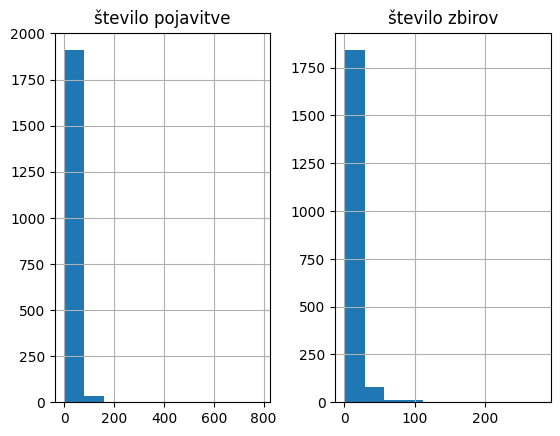

In [68]:
vse_karte2 = vse_karte.sort_values(by="število zbirov", ascending=True).copy()
vse_karte2.hist()


In [18]:
# vse_karte = vse_karte.sort_values(by="število zbirov", ascending=False)
vse_karte.sort_values(by="število pojavitve", ascending=False).head(30).style.hide(axis="index")

karta,število pojavitve,število zbirov,lokacija
"Maxx ""C""",788,265,main
Infinite Impermanence,771,280,main
Ash Blossom & Joyous Spring,712,242,main
Called by the Grave,524,262,main
Evenly Matched,353,136,main
S:P Little Knight,262,244,extra
Droll & Lock Bird,256,101,main
Triple Tactics Talent,242,156,main
Effect Veiler,233,105,main
Crossout Designator,175,175,main


In [8]:
strategije

,ime strategije,število zbirov
0,Yubel,50
1,Voiceless Voice,38
2,Snake-Eye Fire King,21
3,Branded,16
4,Tearlaments,16
...,...,...
74,Ursarctic,1
75,Vaalmonica,1
76,Virtual World,1
77,Volcanic,1
